In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path=r"C:\Users\deepa\Downloads\placement (1).csv"

In [78]:
df=pd.read_csv(path)

In [79]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'package')

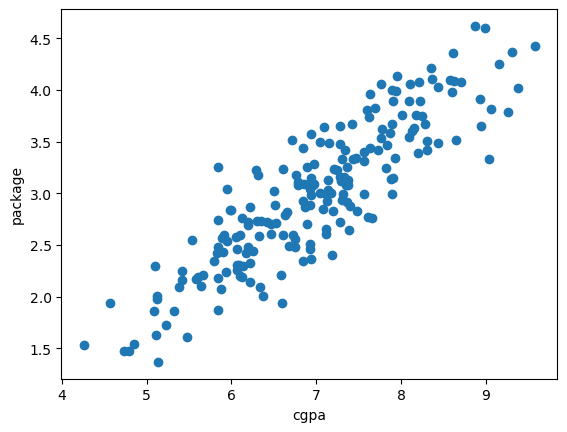

In [80]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel("cgpa")
plt.ylabel("package")

In [81]:
# now we can apply linear regression  because distribution is of sort of linear
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
x=df.iloc[:,0].values.reshape(-1,1)
y=df.iloc[:,-1].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape

(160, 1)

In [82]:
lr.fit(x_train,y_train)
res=lr.predict(x_test)

In [83]:
res

array([2.78031348, 3.13635249, 3.1995207 , 2.38981908, 3.52684689,
       3.76803461, 3.16506531, 2.54486832, 3.17655044, 3.4923915 ,
       1.90744364, 2.34962112, 3.6876387 , 2.75734322, 3.47516381,
       3.04447145, 2.32665086, 3.20526327, 2.17734418, 3.314372  ,
       2.45298729, 2.90090734, 3.32011456, 2.87219451, 3.33734226,
       2.19457187, 1.41932564, 2.7114027 , 3.18229301, 2.32665086,
       3.74506435, 2.95833298, 3.68189614, 2.97556068, 2.59080884,
       3.34882738, 2.47595755, 3.07318428, 4.17575671, 2.95833298])

In [84]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mean_absolute_error(y_test,res)

0.23150985393278373

In [85]:
mean_squared_error(y_test,res)

0.08417638361329657

In [86]:
np.sqrt(mean_squared_error(y_test,res))

np.float64(0.2901316659954521)

In [87]:
r2=r2_score(y_test,res)
r2

0.7730984312051673

In [88]:
r2_adj=1-(1-r2)*(39)/38

In [89]:
r2_adj

0.7671273372895138

Text(0, 0.5, 'package')

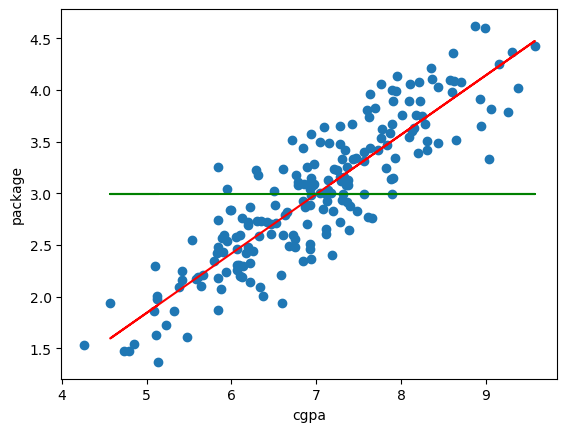

In [90]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,lr.predict(x_train),color="red")
plt.plot(x_train,[y_train.mean()]*len(x_train),color="green")
plt.xlabel("cgpa")
plt.ylabel("package")

In [91]:
# red line is best fit line given by our lr model, and green line is the mean line 

In [92]:
new_df=df.copy()
new_df['random_feature']=np.random.random(200)
new_df=new_df[['cgpa','random_feature','package']]
new_df.head()

,cgpa,random_feature,package
0,6.89,0.206920,3.26
1,5.12,0.598083,1.98
2,7.82,0.313162,3.25
3,7.42,0.478157,3.67
4,6.94,0.544528,3.57


Text(0, 0.5, 'package')

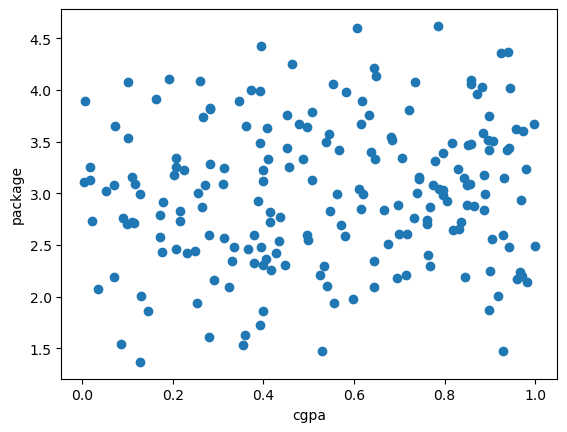

In [93]:
plt.scatter(new_df['random_feature'],new_df['package'])
plt.xlabel("cgpa")
plt.ylabel("package")

In [94]:
# the is relation between the random feature and package in lpa 
# now we can apply linear regression  because distribution is of sort of linear
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
x=new_df.iloc[:,0:2].values
y=new_df.iloc[:,-1].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape

(160, 2)

In [95]:
lr.fit(x_train,y_train)
res=lr.predict(x_test)

In [96]:
r2=r2_score(y_test,res)
x_test.shape
r2

0.7734043209675904

In [99]:
r2_adj=1-(1-r2)*(39)/37

In [100]:
r2_adj

0.7611559058847575